In [3]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [4]:
# Importing DATASET

dataset= pd.read_csv('Churn_Modelling.csv')

In [6]:
dataset

dataset.groupby('Geography').count()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
# Extracting Columns from dataset
X = dataset.iloc[:,3:13]
Y = dataset.iloc[:,13]

In [6]:
# Creating dummy variables(EMPTY COLUMNS) for converting categorical features  to numerical and storing them 
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
## Concatenate the Data Frames
## Add the dummy columns to main dataset
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


In [8]:
from sklearn.model_selection import train_test_split
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding, Flatten, LeakyReLU, BatchNormalization, Dropout
from keras.activations import relu, sigmoid
from keras.layers import LeakyReLU

from sklearn.preprocessing import StandardScaler

/usr/lib/python3/dist-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [11]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1)) # Note: no activation beyond this point
    
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

<ipython-input-12-287853c6df44>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


In [13]:
model

In [14]:
layers = [[20], [40, 20], [45, 30, 15]]
activations = ['sigmoid', 'relu']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])
grid = GridSearchCV(estimator=model, param_grid=param_grid)

In [15]:
grid_result = grid.fit(X_train, Y_train)

In [16]:
[grid_result.best_score_,grid_result.best_params_]

[0.8525000095367432,
 {'activation': 'relu',
  'batch_size': 128,
  'epochs': 30,
  'layers': [45, 30, 15]}]

In [17]:
pred_y = grid.predict(X_test)

In [18]:



# Initialising the ANN
# Empty NN
classifier = Sequential()

In [19]:
# Input & 1st hidden layer
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [20]:
# 2nd hidden layer
# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))


In [21]:
# Output layer
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform',activation='sigmoid'))


In [22]:
classifier.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 6)                 72        
                                                                 
 dense_185 (Dense)           (None, 6)                 42        
                                                                 
 dense_186 (Dense)           (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [24]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, Y_train,validation_split=0.33, batch_size = 100, epochs = 200)


Epoch 1/200
54/54 [==============================] - 1s 7ms/step - loss: 0.5378 - accuracy: 0.7932 - val_loss: 0.5141 - val_accuracy: 0.7902
Epoch 2/200
54/54 [==============================] - 0s 4ms/step - loss: 0.5103 - accuracy: 0.7959 - val_loss: 0.4953 - val_accuracy: 0.7940
Epoch 3/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4923 - accuracy: 0.7962 - val_loss: 0.4828 - val_accuracy: 0.7955
Epoch 4/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4797 - accuracy: 0.7962 - val_loss: 0.4737 - val_accuracy: 0.7955
Epoch 5/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4703 - accuracy: 0.7962 - val_loss: 0.4663 - val_accuracy: 0.7955
Epoch 6/200
54/54 [==============================] - 0s 4ms/step - loss: 0.4631 - accuracy: 0.7962 - val_loss: 0.4612 - val_accuracy: 0.7955
Epoch 7/200
54/54 [==============================] - 0s 3ms/step - loss: 0.4572 - accuracy: 0.7962 - val_loss: 0.4567 - val_accuracy: 0.7955
Epoch 8/200
5

Epoch 59/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3496 - accuracy: 0.8556 - val_loss: 0.3685 - val_accuracy: 0.8413
Epoch 60/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3490 - accuracy: 0.8567 - val_loss: 0.3680 - val_accuracy: 0.8417
Epoch 61/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3486 - accuracy: 0.8558 - val_loss: 0.3677 - val_accuracy: 0.8436
Epoch 62/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3479 - accuracy: 0.8567 - val_loss: 0.3675 - val_accuracy: 0.8444
Epoch 63/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3475 - accuracy: 0.8565 - val_loss: 0.3667 - val_accuracy: 0.8459
Epoch 64/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8578 - val_loss: 0.3664 - val_accuracy: 0.8455
Epoch 65/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8587 - val_loss: 0.3664 - val_accuracy: 0.8455
Epoch 

54/54 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8642 - val_loss: 0.3620 - val_accuracy: 0.8550
Epoch 117/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8636 - val_loss: 0.3620 - val_accuracy: 0.8542
Epoch 118/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8638 - val_loss: 0.3615 - val_accuracy: 0.8538
Epoch 119/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3354 - accuracy: 0.8638 - val_loss: 0.3622 - val_accuracy: 0.8554
Epoch 120/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3352 - accuracy: 0.8645 - val_loss: 0.3614 - val_accuracy: 0.8550
Epoch 121/200
54/54 [==============================] - 0s 4ms/step - loss: 0.3349 - accuracy: 0.8621 - val_loss: 0.3620 - val_accuracy: 0.8550
Epoch 122/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.8627 - val_loss: 0.3620 - val_accuracy: 0.8546
Epoch 123/200

54/54 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8658 - val_loss: 0.3608 - val_accuracy: 0.8573
Epoch 174/200
54/54 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.8643 - val_loss: 0.3605 - val_accuracy: 0.8561
Epoch 175/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8655 - val_loss: 0.3607 - val_accuracy: 0.8565
Epoch 176/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8645 - val_loss: 0.3606 - val_accuracy: 0.8554
Epoch 177/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3319 - accuracy: 0.8655 - val_loss: 0.3608 - val_accuracy: 0.8573
Epoch 178/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3320 - accuracy: 0.8655 - val_loss: 0.3609 - val_accuracy: 0.8569
Epoch 179/200
54/54 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8655 - val_loss: 0.3611 - val_accuracy: 0.8569
Epoch 180/200

In [25]:

# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


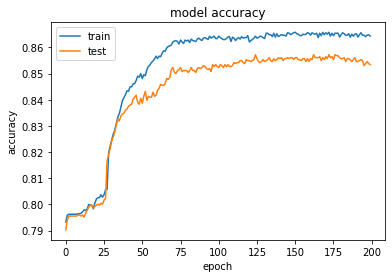

In [26]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

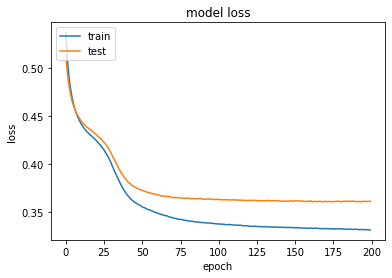

In [27]:

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
Y_pred = classifier.predict(X_test)
Y_pred = (Y_pred > 0.5)

In [30]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [31]:
cm

array([[1515,   80],
       [ 198,  207]])

In [32]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_pred,Y_test)

In [33]:
score


0.861